# Day 3: overview of useful Python packages

* `git` and [github.com](https://www.github.com)
* `pre-commit`
* `ruff` and/or `black`
* `mypy`
* unit tests
* `numba`
* `seaborn`

## `git`

# Working with version control systems (git)

## What is a version control system?

![Version Control](https://github.com/martwo/teaching/raw/master/WS_2022_23/advanced_python/figures/version_control.png)

* Allows to keep track of changes (versions) of files.
* Tracks the history of a file.
* Manages a **repository**, i.e. a collection of files, usually a directory tree.
* Allows collaborating on same files by several people.
    * Conflict resolution
* Allows branching-off from the main development path, i.e. **branches**.
    * Branches can be merged

## What is `git`?

* A version control system developed by the inventor of the Linux kernel, Linus Torvalds.
* A decentralized system
    * repositories are stored locally on the user's computer
    * a central (remote) repository might exists, e.g. github.com

## Cloning a repository

To clone a repository use the `git clone <repo_url>.git <local_dir>` command:

```bash
git clone https://github.com/clagunas/example_project.git example_project
```

This copies (clones) the **master** branch of the repository from the remote location to the local disk.

## Working with branches

![Git Branches](https://github.com/martwo/teaching/raw/master/WS_2022_23/advanced_python/figures/git_branches.png)

* A branch represents an independent line of development.
* Always use a new branch when making large code changes, e.g. new feature development or bug fix! 

### List available branches
To list all available remote branches type:

```bash
git branch -a
```

### Creating a new branch

To work on a new feature or bug fix, one should create a new branch from the *master* branch.

* Clone the repository.
* Checkout a new branch via the `git checkout -b <branch>` command.

```bash
git clone https://github.com/clagunas/example_project.git example_project.my_new_feature
cd example_project.my_new_feature/
git checkout -b my_new_feature
```

After creating the new branch it lives in your local repository. In order to copy it to the remote repository one uses the `git push --set-upstream origin <branch>` command:

```bash
git push --set-upstream origin my_new_feature
```

To see on which branch you are currently working on use

```bash
git branch
```
to get the list of available branches.

## Commiting code changes

After making code changes, these changes must be committed to the branch as a commit.

To see the changed files:

```bash
git status
```

To see the changes of a file:

```bash
git diff <file>
```

To stage a changed file for a commit, use the `git add` command:

```bash
git add <file>
```

To commit all staged files:

```bash
git commit -m "My commit description"
```


## Merging two branches

After a bug was fixed or a new feature was implemented the development branch needs to be merged with the *master* branch.

![Merging two branches](https://github.com/martwo/teaching/raw/master/WS_2022_23/advanced_python/figures/git_branch_merge.png)

* Make sure to be in the correct receiving branch, e.g. master:

```bash
git checkout master
```

* Fetch and pull the latest updates of the receiving branch:

```bash
git fetch
git pull --rebase
```
Note: always do ``git pull --rebase``!

* Marge the feature branch into the master branch:

```bash
git merge my_new_feature
```

* Delete the feature branch:

```bash
git branch -d my_new_feature
```

* Reset the last commit: 

```bash
git reset HEAD^
```

* Stashing before pulling to temporarily store uncommitted work.

```bash
git stash save 'some message'
```

* To restore the stashed work:

```bash
git stash apply
```

## Resolving merge conflicts

* Merge conflicts occur when the **same part of the same file** was **changed by both branches**.
* `git merge` will fail before creating the merge commit.
* `git status` will tell where merge conflics are.

```
here is some content not affected by the conflict
<<<<<<< master
this is conflicted text from master
=======
this is conflicted text from my_new_feature branch
>>>>>>> my_new_feature;
```

* Edit the conflicting files to resolve the conflict.
* Stage the changed files with `git add`.
* Perform a final merge commit with `git commit`.

## Pull requests on github.com

* *github.com* provides the functionality to create **pull requests**.
* Pull requests are branches that **ask to be pulled** into the master branch via a merge operation.
* Pull requests can be **code-reviewed** before merging.

# `pre-commit`

Git hook scripts are useful for identifying and automatically fixing issues before committing code changes.

You can install `pre-commit` via `pip install pre-commit`

Add a pre-commit configuration file `.pre-commit-config.yaml` to the root of your repository:

Example configuration file:

```yaml
-   repo: https://github.com/pre-commit/pre-commit-hooks
    rev: v2.3.0
    hooks:
    -   id: check-yaml
    -   id: end-of-file-fixer
    -   id: trailing-whitespace

- repo: https://github.com/astral-sh/ruff-pre-commit
  # Ruff version.
  rev: v0.7.2
  hooks:
    # Run the linter.
    - id: ruff
    # Run the formatter.
    - id: ruff-format

-   repo: https://github.com/psf/black
    rev: 22.10.0
    hooks:
    -   id: black
```

Run `pre-commit install` locally to set up the git hook scripts. Now `pre-commit` will run automatically on every git commit!

# `ruff` and `black`

When working in a team, it is important to have a consistent code style. `ruff` and `black` are two Python packages that help to enforce a consistent code style.

The Ruff Linter can also replace packages like `Flake8` (plus dozens of plugins), `isort`, `pydocstyle`, `pyupgrade`, `autoflake`, and more.

In [10]:
# unused import for ruff example
import sys

- `ruff` is an extremely fast Python linter and code formatter, written in Rust.
- `black` is a Python code formatter.

In [9]:
!ruff check ./lecture_day3.ipynb

lecture_day3.ipynb:cell 23:1:8: F401 [*] `sys` imported but unused
  |
1 | import sys
  |        ^^^ F401
  |
  = help: Remove unused import: `sys`

lecture_day3.ipynb:cell 32:2:5: F811 Redefinition of unused `ident_np` from cell 30, line 1
  |
1 | @jit
2 | def ident_np(x):
  |     ^^^^^^^^ F811
3 |     return np.cos(x) ** 2 + np.sin(x) ** 2
  |
  = help: Remove definition: `ident_np`

lecture_day3.ipynb:cell 36:2:5: F811 Redefinition of unused `ident_loops` from cell 34, line 1
  |
1 | @jit
2 | def ident_loops(x):
  |     ^^^^^^^^^^^ F811
3 |     r = np.empty_like(x) 
4 |     for i in range(len(x)):
  |
  = help: Remove definition: `ident_loops`

lecture_day3.ipynb:cell 40:2:5: F811 Redefinition of unused `ident_loops` from cell 36, line 2
  |
1 | @njit
2 | def ident_loops(x):
  |     ^^^^^^^^^^^ F811
3 |     r = np.empty_like(x) 
4 |     for i in range(len(x)):
  |
  = help: Remove definition: `ident_loops`

lecture_day3.ipynb:cell 48:2:5: F811 Redefinition of unused `ident_loops` fr

You can automatically fix the errors by running `ruff check --fix` and apply formatting by running `ruff format`.

In [13]:
# Using --diff to show the difference between the original and the formatted file without applying the changes.
!ruff format --diff ./lecture_day3.ipynb

--- lecture_day3.ipynb:cell 18
+++ lecture_day3.ipynb:cell 18
--- lecture_day3.ipynb:cell 21
+++ lecture_day3.ipynb:cell 21
--- lecture_day3.ipynb:cell 23
+++ lecture_day3.ipynb:cell 23
--- lecture_day3.ipynb:cell 25
+++ lecture_day3.ipynb:cell 25
--- lecture_day3.ipynb:cell 28
+++ lecture_day3.ipynb:cell 28
--- lecture_day3.ipynb:cell 29
+++ lecture_day3.ipynb:cell 29
@@ -1 +1 @@
-x = np.arange(1.e7)
+x = np.arange(1.0e7)
--- lecture_day3.ipynb:cell 30
+++ lecture_day3.ipynb:cell 30
--- lecture_day3.ipynb:cell 31
+++ lecture_day3.ipynb:cell 31
--- lecture_day3.ipynb:cell 32
+++ lecture_day3.ipynb:cell 32
--- lecture_day3.ipynb:cell 33
+++ lecture_day3.ipynb:cell 33
--- lecture_day3.ipynb:cell 34
+++ lecture_day3.ipynb:cell 34
@@ -1,5 +1,5 @@
 def ident_loops(x):
-    r = np.empty_like(x) 
+    r = np.empty_like(x)
     for i in range(len(x)):
-        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2 
+        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2
     return r
--- lecture_day3.ipyn

In [19]:
# Using --diff to show the difference between the original and the formatted file without applying the changes.
!black --diff --color ./lecture_day3.ipynb

--- lecture_day3.ipynb	2024-11-04 10:06:45.946606+00:00:cell_28
+++ lecture_day3.ipynb	2024-11-04 10:14:44.832429+00:00:cell_28
@@ -1 +1 @@
-x = np.arange(1.e7)
+x = np.arange(1.0e7)
--- lecture_day3.ipynb	2024-11-04 10:06:45.946606+00:00:cell_33
+++ lecture_day3.ipynb	2024-11-04 10:14:44.832429+00:00:cell_33
@@ -1,5 +1,5 @@
 def ident_loops(x):
-    r = np.empty_like(x) 
+    r = np.empty_like(x)
     for i in range(len(x)):
-        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2 
+        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2
     return r
--- lecture_day3.ipynb	2024-11-04 10:06:45.946606+00:00:cell_35
+++ lecture_day3.ipynb	2024-11-04 10:14:44.832429+00:00:cell_35
@@ -1,6 +1,6 @@
 @jit
 def ident_loops(x):
-    r = np.empty_like(x) 
+    r = np.empty_like(x)
     for i in range(len(x)):
-        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2 
+        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2
     return r
--- lecture_day3.ipynb	2024-11-04 10:06:45.946606+00:00:cell_39
+++ lec

# `mypy`

`mypy` is a static type checker for Python. It can be used to check the types of variables and functions in your code.

- It does not run the code, just like a linter.
- It allow to catch errors with variable types.

In order to use `mypy`, you need to add type annotations to your code. For example:

```python
def add(a: int, b: int) -> int:
    return a + b
```

Annotation example:
```python
# This is how you declare the type of a variable
age: int = 1

# You don't need to initialize a variable to annotate it
a: int  # Ok (no value at runtime until assigned)

# Doing so can be useful in conditional branches
child: bool
if age < 18:
    child = True
else:
    child = False
```

# Unit Tests with Python

* Python provides the `unittest` package implementing a unit test framework.
* See [docs.python.org/3/library/unittest.html](https://docs.python.org/3/library/unittest.html) for documentation.
* Unit tests should test small pieces of software, e.g. functions or class methods for its correct behavior.
* Write a unit test after fixing a bug to make sure the bug is not re-introduced in the future!

In [21]:
import unittest

class TestStringMethods(unittest.TestCase):

    def test_upper(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper())
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # check that s.split fails when the separator is not a string
        with self.assertRaises(TypeError):
            s.split(2)

# if __name__ == '__main__':
#     unittest.main()

* Test cases are derived classes from the `unittest.TestCase` base class.
* Tests are implemented via class instance methods with names starting with `test`.
* Special `assert` methods are used to ensure correct variable values.
* Numpy provides the `numpy.testing` module with useful assert functions for testing numpy arrays.

Each `test_*` method specifies a test case, where each case is run separately. The `assert*` methods are used to verify the expected behavior.

If you want to set up some data before running each test case, you can use the `setUp` and `tearDown` methods.

In [22]:
class WidgetTestCase(unittest.TestCase):
    def setUp(self):
        self.widget = Widget('The widget')

    def tearDown(self):
        self.widget.dispose()

# What is numba?

- Numba provides decorators to compile specific python funcions
 
- Functions are compiled automatically "Just-In-Time" (JIT) into optimised machine code

- Functions are entirely python

# @jit: just-in-time compilation

- A Python function that is decorated with @jit is compiled “just-in-time”, i.e. on the first call of the function

- Subsequent calls use the already-complied implementation of the function

- Simple Python/Numpy operations will not benefit significantly from @jit 

- However, complex Numpy operations and loops can benefit greatly!

In [1]:
from numba import jit
import numpy as np

In [2]:
x = np.arange(1.e7)

In [3]:
def ident_np(x):
    return np.cos(x) ** 2 + np.sin(x) ** 2

In [4]:
%timeit ident_np(x)

130 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
@jit
def ident_np(x):
    return np.cos(x) ** 2 + np.sin(x) ** 2

In [6]:
%timeit ident_np(x)

76.1 ms ± 185 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
def ident_loops(x):
    r = np.empty_like(x) 
    for i in range(len(x)):
        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2 
    return r

In [8]:
%timeit ident_loops(x)

9.39 s ± 39.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
@jit
def ident_loops(x):
    r = np.empty_like(x) 
    for i in range(len(x)):
        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2 
    return r

In [10]:
%timeit ident_loops(x)

76.2 ms ± 51.9 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# @jit(nopython=True)

- @jit will always try to operate in “no-Python mode”, i.e. it generates code that does not access the Python C API

- If there are types or functions used in the decorated function that are unknown to Numba, then @jit falls back onto “object mode” (this fall-back is being deprecated)

- In “object mode” the optimisations that Numba can provide are limited

- One should therefore always strive to achieve “no-Python mode” with the nopython=True argument (or @njit), Numba will raise an error if “no-Python mode” could not be achieved for the function

In [11]:
from numba import njit

In [12]:
@njit
def ident_loops(x):
    r = np.empty_like(x) 
    for i in range(len(x)):
        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2 
    return r

In [13]:
%timeit ident_loops(x)

77.2 ms ± 989 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# @jit(fastmath=True)

- @jit can provide additional performance if you relax the numerical rigour. This is provided by the LLVM compiler, allowing:

    - The execution of potentially unsafe floating-point operations.
    - Approximations for arithmetic and mathematical functions
    - Floating-point reassociation

- Fastmath allows the for-loop to be vectorised

In [16]:
@njit(fastmath=False)
def do_sum_slow(A):
    acc = 0. 
    for x in A:
        acc += np.sqrt(x) 
    return acc

In [14]:
@njit(fastmath=True)
def do_sum(A):
    acc = 0. 
    for x in A:
        acc += np.sqrt(x) 
    return acc

In [17]:
%timeit do_sum_slow(x)

9.54 ms ± 19.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%timeit do_sum(x)

6.31 ms ± 41.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# `@jit(nopython=True, parallel=True)`

- @jit can parallelize loops, and certain supported operations 

- Use `numba.prange` in place of `range` for parallelized for-loop

In [20]:
@jit
def ident_loops(x):
    r = np.empty_like(x) 
    for i in range(len(x)):
        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2 
    return r

In [21]:
%timeit ident_loops(x)

76.9 ms ± 403 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
from numba import prange

In [27]:
@jit(nopython=True)
def ident_loops(x):
    r = np.empty_like(x) 
    for i in prange(len(x)):
        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2 
    return r

In [28]:
%timeit ident_loops(x)

77.1 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
@jit(nopython=True, parallel=True)
def ident_loops(x):
    r = np.empty_like(x) 
    for i in prange(len(x)):
        r[i] = np.cos(x[i]) ** 2 + np.sin(x[i]) ** 2 
    return r

In [26]:
%timeit ident_loops(x)

19 ms ± 98.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# @vectorize: Creating numpy ufuncs

- Universal functions (ufuncs) are the building blocks of Numpy (and Scipy)
- Defines how the scalar elements of an array are operated on (e.g. np.sin, np.add...)
- Normally creating a Numpy ufunc can be difficult, often requiring C code to be written
- The Numba @vectorize decorator provides a straightforward way to create a new ufunc from pure Python, producing optimised compiled code similar to @jit

In [ ]:
from numba import vectorize
from math import sin, cos

@vectorize
def ident_ufunc(x, y):
    return cos(x) ** 2 + sin(y) ** 2

print(ident_ufunc(3, 5))
print(ident_ufunc(3, np.arange(5)))
print(ident_ufunc(np.arange(3), np.arange(5)[:, None]))

1.899620907863409
[0.98008514 1.68815856 1.80690695 1.         1.55283516]
[[1.         0.29192658 0.17317819]
 [1.70807342 1.         0.88125161]
 [1.82682181 1.11874839 1.        ]
 [1.01991486 0.31184144 0.19309305]
 [1.57275002 0.8646766  0.74592821]]


# Summary

Numba Pros:

- Easily-produced efficient code
- Functions are entirely defined in Python
- Compilation is automatic and only when needed
- Allows Python loops without sacrificing performance

Numba Cons:

- Cannot utilise unsupported methods (e.g. SciPy)
- Steep learning curve

When to use Numba:

- Calling the same function many times, which applies complex operations on large arrays 
- In place of wrapping C/C++ code?

How to use Numba:

- Use @njit to force no-Python mode
- Feel free to write Python loops
- Replace SciPy-provided mathematical formulae with your own “jitted” versions

# `seaborn`

`seaborn` is a Python visualization library providing a high level interface. It is built on top of `matplotlib` and provides a more attractive and informative visualizations.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

Text(0.5, 1.0, 'Large KDE bandwidth: washed out')

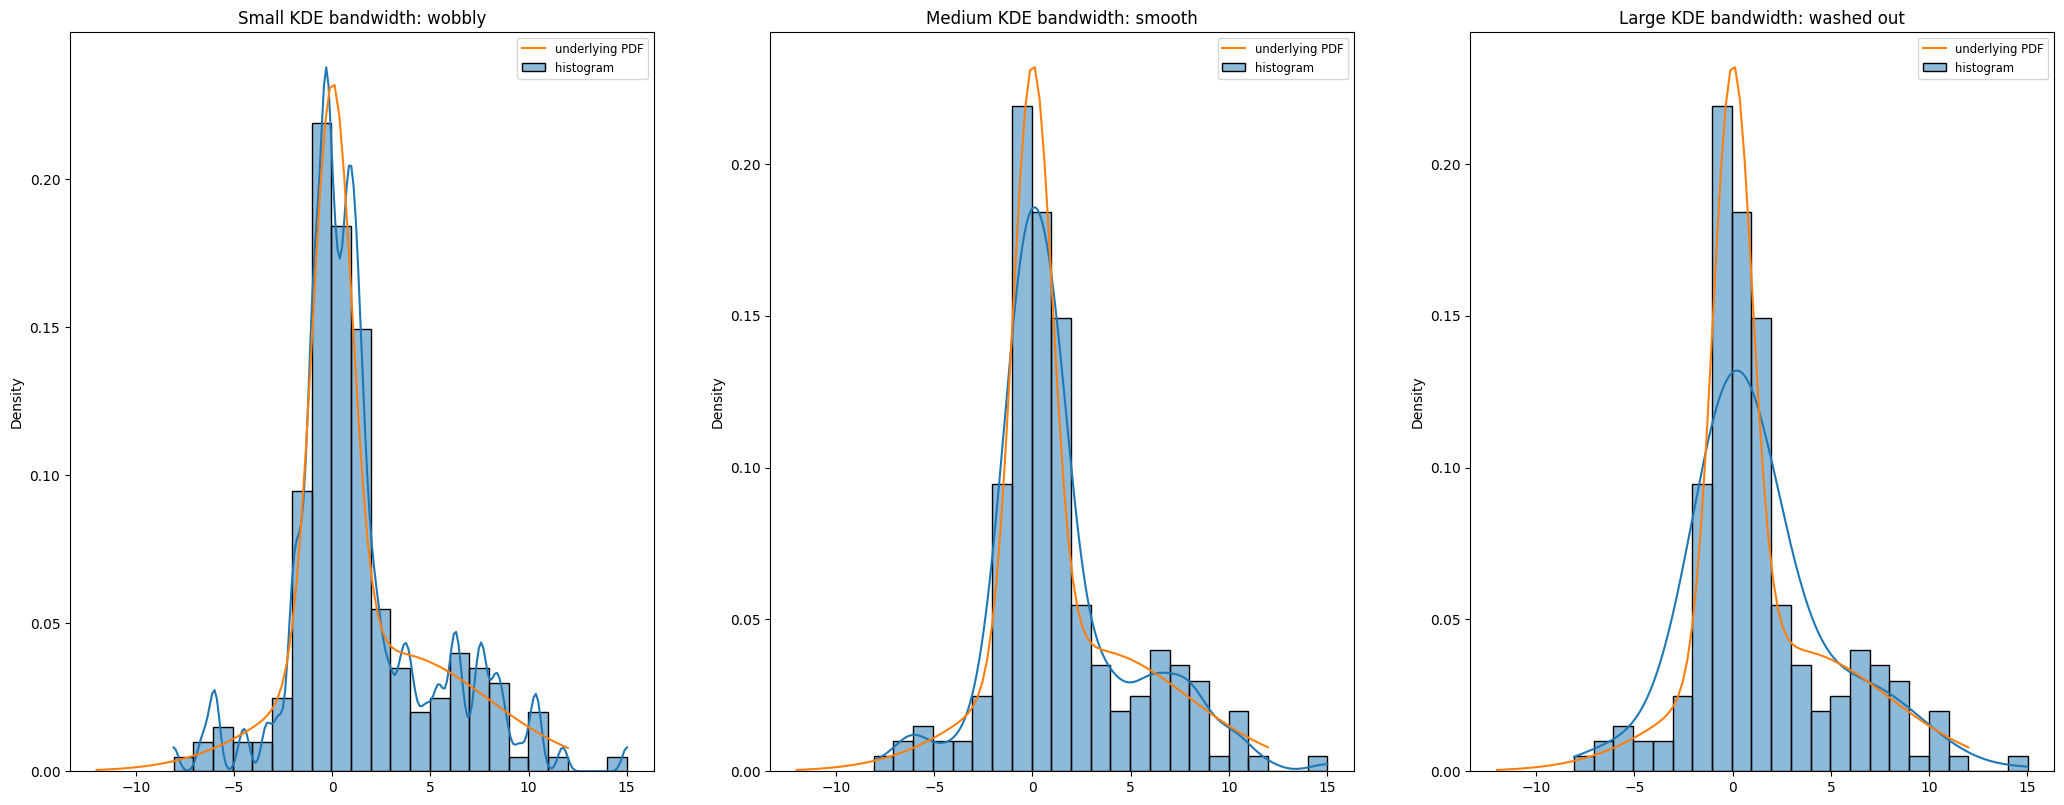

In [36]:
G = scipy.stats.norm
size = 100
data = np.random.normal(size=size)
data = np.hstack( # we stack two normal distributions with different parameters
    (data, np.random.normal(
        loc=3,
        scale=5,
        size=size)
    )
)
# Plot the distribution as histogram, overlayed with a kernel density estimate and rugplot
f, axes = plt.subplots(ncols=3, figsize=sns.mpl.rcParams["figure.figsize"]*np.array([4,2]))
# let's try different band-widths
sns.histplot(data, stat="density", kde=True, kde_kws = {"bw_adjust": 0.2}, ax=axes[0], label="histogram")
sns.histplot(data, stat="density", kde=True, kde_kws = {"bw_adjust": 0.7}, ax=axes[1], label="histogram")
sns.histplot(data, stat="density", kde=True, kde_kws = {"bw_adjust": 1.5}, ax=axes[2], label="histogram")
x = np.linspace(-12, 12, 100)
axes[0].plot(x, (G(0, 1).pdf(x) + G(3, 5).pdf(x)) / 2, label="underlying PDF", color="tab:orange")
axes[1].plot(x, (G(0, 1).pdf(x) + G(3, 5).pdf(x)) / 2, label="underlying PDF", color="tab:orange")
axes[2].plot(x, (G(0, 1).pdf(x) + G(3, 5).pdf(x)) / 2, label="underlying PDF", color="tab:orange")
axes[0].legend(loc=0, fontsize="small")
axes[1].legend(loc=0, fontsize="small")
axes[2].legend(loc=0, fontsize="small")
axes[0].set_title("Small KDE bandwidth: wobbly")
axes[1].set_title("Medium KDE bandwidth: smooth")
axes[2].set_title("Large KDE bandwidth: washed out")


## Cool 2D plots with marginal distributions

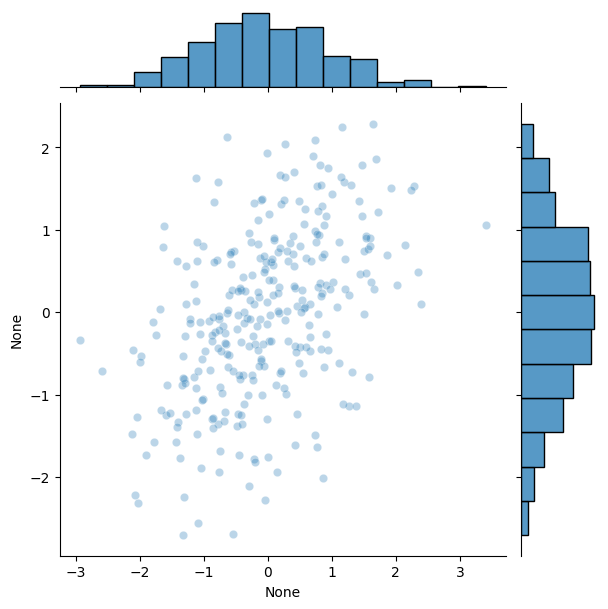

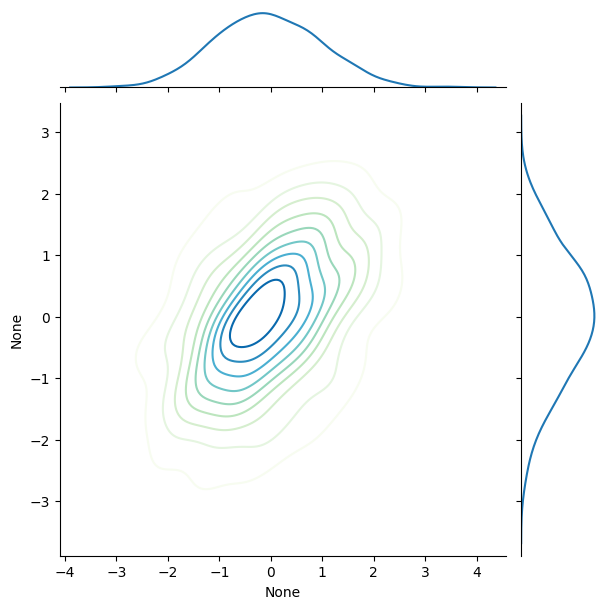

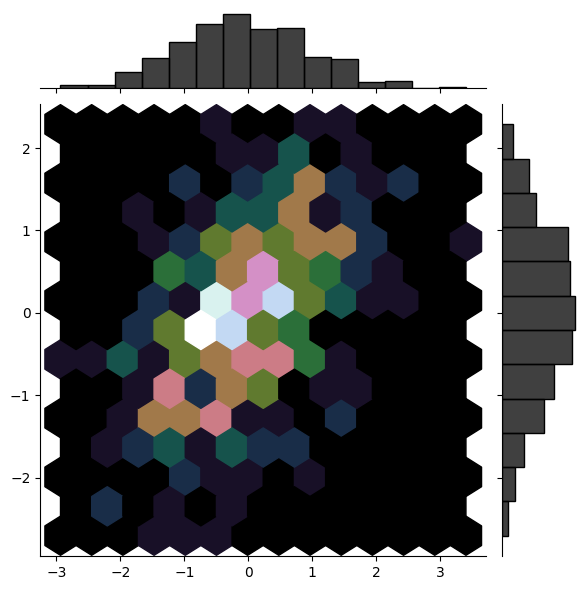

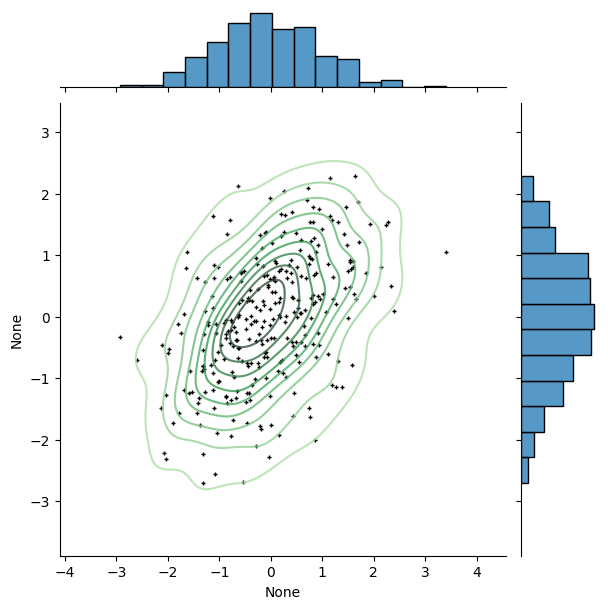

In [45]:
data = scipy.stats.multivariate_normal.rvs(cov = [[1, 0.5],[0.5, 1]], size=300)

# Plot joint and mariginal distributions as scatter/histogram with transparency
sns.jointplot(x=data[:,0], y=data[:,1], alpha=0.3)
# Plot joint and mariginal distributions as kde
sns.jointplot(x=data[:,0], y=data[:,1], kind = "kde", cmap="GnBu")
# Plot joint as hex-plot, which looks really cool 8)
sns.jointplot(x=data[:,0], y=data[:,1], kind = "hex", cmap="cubehelix", color="black")

# For more control we can use JointGrid and specify the indivual
# plotting functions for the joint and marginal dists.
g = sns.JointGrid(x=data[:,0], y=data[:,1])
g.plot_joint(plt.scatter, c="k", s=10, linewidth=1, marker="+", alpha=1)
g.plot_joint(sns.kdeplot, cmap="Greens_d", alpha=0.8)
g.plot_marginals(sns.histplot, kde=False)
